In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("cleaned_road_accident.csv")

In [5]:
print(df.head())
print(df.isnull().sum())

        status accident_index  accident_year accident_reference  \
0  Unvalidated  2022070151244           2022          070151244   
1  Unvalidated  2022070152668           2022          070152668   
2  Unvalidated  2022070154696           2022          070154696   
3  Unvalidated  2022070154696           2022          070154696   
4  Unvalidated  2022070154696           2022          070154696   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  2                   1               1                2   
1                  1                   1               1                1   
2                  1                   1               1                2   
3                  2                   3               1                2   
4                  3                   2               1                1   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               46                     8                  3   
1       

In [7]:
label_encoders = {}
categorical_cols = ['casualty_class', 'sex_of_casualty', 'age_band_of_casualty',
                    'pedestrian_location', 'pedestrian_movement', 'casualty_type',
                    'casualty_home_area_type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [8]:
columns_to_drop = ['accident_index', 'accident_reference', 'lsoa_of_casualty', 'status']
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [34]:
X = df.drop('casualty_severity', axis=1)
y = df['casualty_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Model Building - Random Forest
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.76057371 0.74655692 0.75460473 0.75623472 0.75599022]
Mean Accuracy: 0.7548
Standard Deviation: 0.0046


In [36]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7529609909812017
[[    2    36   210]
 [   13   554  2994]
 [   44  1250 13303]]
              precision    recall  f1-score   support

           1       0.03      0.01      0.01       248
           2       0.30      0.16      0.21      3561
           3       0.81      0.91      0.86     14597

    accuracy                           0.75     18406
   macro avg       0.38      0.36      0.36     18406
weighted avg       0.70      0.75      0.72     18406



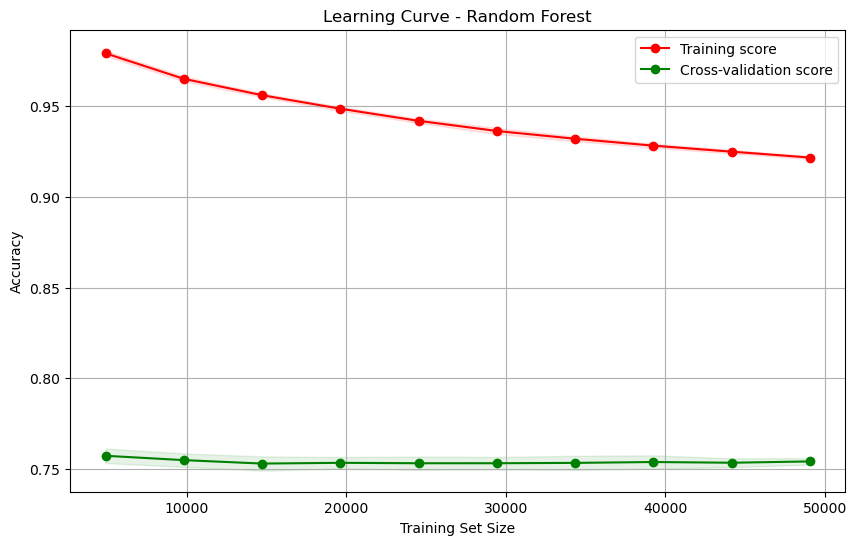

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define model
model = RandomForestClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

# Calculate mean and std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


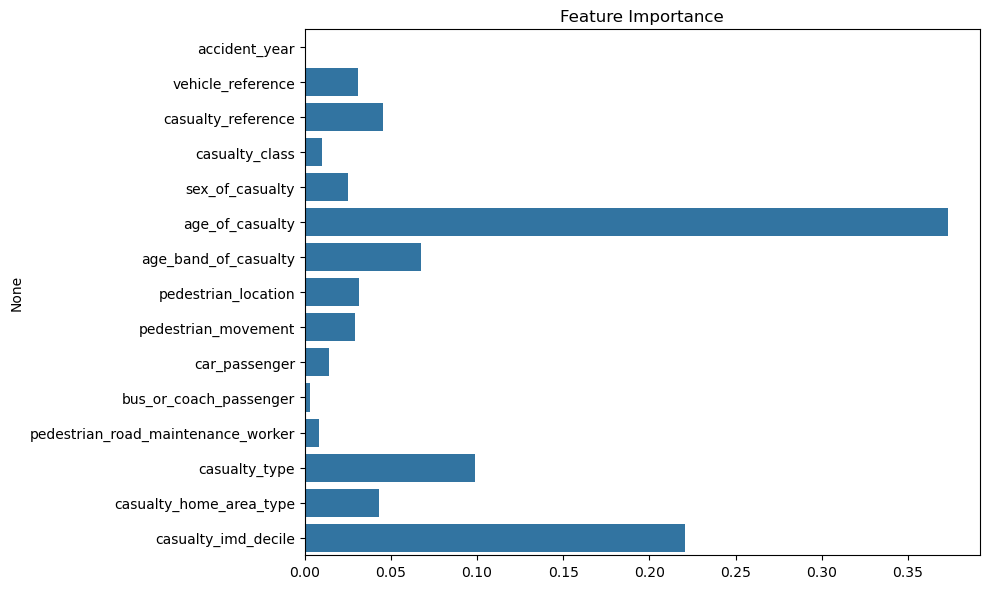

In [12]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()